<a href="https://colab.research.google.com/github/Vishnu290504/EDA/blob/main/21bds0073_eda_da1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EXPLORATORY DATA ANALYSIS**

**DIGITAL ASSIGNMENT - 1**

**NAME:** *VISHNU K*

**REG NO:** *21BDS0073*

In [108]:
import pandas as pd
df = pd.read_csv("NaturalGas.csv")

In [109]:
df

,rownames,state,statecode,year,consumption,price,eprice,oprice,lprice,heating,income
0,1,NY,35,1967,313656,1.42,2.98,7.40,1.47,6262,10903.75
1,2,NY,35,1968,319282,1.38,2.91,7.77,1.42,6125,11370.02
2,3,NY,35,1969,331326,1.37,2.84,7.96,1.38,6040,11578.68
3,4,NY,35,1970,346533,1.40,2.87,8.33,1.37,6085,11586.77
4,5,NY,35,1971,352085,1.50,3.07,8.80,1.40,5907,11657.42
...,...,...,...,...,...,...,...,...,...,...,...
133,134,CA,5,1985,527495,5.72,7.78,30.58,5.84,2694,14368.46
134,135,CA,5,1986,464307,5.14,7.95,44.15,5.72,2192,14580.77
135,136,CA,5,1987,503473,5.26,8.03,35.24,5.14,2502,14915.05
136,137,CA,5,1988,497138,5.64,8.69,34.02,5.26,2366,15340.38


Check duplicates and drop if any

In [110]:
df.duplicated().sum()

0

In [111]:
print("Data Types:", df.dtypes)

Data Types: rownames         int64
state           object
statecode        int64
year             int64
consumption      int64
price          float64
eprice         float64
oprice         float64
lprice         float64
heating          int64
income         float64
dtype: object


In [112]:
print("Dimensions:", df.shape)

Dimensions: (138, 11)


In [113]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
         rownames  statecode         year    consumption       price  \
count  138.000000  138.00000   138.000000     138.000000  138.000000   
mean    69.500000   27.00000  1978.000000  252901.478261    3.422319   
std     39.981246   15.68811     6.657415  184478.131559    2.169215   
min      1.000000    5.00000  1967.000000    9430.000000    0.680000   
25%     35.250000   10.00000  1972.000000   49103.500000    1.380000   
50%     69.500000   29.00000  1978.000000  300835.500000    2.775000   
75%    103.750000   44.00000  1984.000000  346428.750000    5.310000   
max    138.000000   45.00000  1989.000000  637289.000000    8.060000   

           eprice      oprice      lprice      heating        income  
count  138.000000  138.000000  138.000000   138.000000    138.000000  
mean     5.053551   24.635580    3.207681  4154.528986  11193.235652  
std      2.577859   15.401018    2.124937  2451.998462   1906.726093  
min      1.980000    5.010000    0.680000   48

In [114]:
print("\nInformation:")
print(df.info())


Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rownames     138 non-null    int64  
 1   state        138 non-null    object 
 2   statecode    138 non-null    int64  
 3   year         138 non-null    int64  
 4   consumption  138 non-null    int64  
 5   price        138 non-null    float64
 6   eprice       138 non-null    float64
 7   oprice       138 non-null    float64
 8   lprice       138 non-null    float64
 9   heating      138 non-null    int64  
 10  income       138 non-null    float64
dtypes: float64(5), int64(5), object(1)
memory usage: 12.0+ KB
None


Check for null values and handle if any

In [115]:
df.isnull().any()

,0
rownames,False
state,False
statecode,False
year,False
consumption,False
price,False
eprice,False
oprice,False
lprice,False
heating,False


In [116]:
df.isnull().sum().sum()

0

Get dummies for State column because machine cant work on strings

In [117]:
dummy = pd.get_dummies(df['state'],prefix="State").astype(int)
df1 = pd.concat([df, dummy], axis=1)
df1 = pd.concat([df, dummy], axis=1)
df1.drop(['state'], axis=1, inplace=True)
df1.head()

,rownames,statecode,year,consumption,price,eprice,oprice,lprice,heating,income,State_CA,State_FL,State_MI,State_NY,State_TX,State_UT
0,1,35,1967,313656,1.42,2.98,7.40,1.47,6262,10903.75,0,0,0,1,0,0
1,2,35,1968,319282,1.38,2.91,7.77,1.42,6125,11370.02,0,0,0,1,0,0
2,3,35,1969,331326,1.37,2.84,7.96,1.38,6040,11578.68,0,0,0,1,0,0
3,4,35,1970,346533,1.40,2.87,8.33,1.37,6085,11586.77,0,0,0,1,0,0
4,5,35,1971,352085,1.50,3.07,8.80,1.40,5907,11657.42,0,0,0,1,0,0


**Univariate Analysis**

In [118]:
print("\nMode:", df['income'].mode())
print("\nMedian:", df['income'].median())
print("\nMean:", df['income'].mean())


Mode: 0       7465.34
1       7560.08
2       7661.95
3       7865.50
4       7930.66
         ...   
133    15047.09
134    15340.38
135    15532.93
136    15946.92
137    16425.33
Name: income, Length: 138, dtype: float64

Median: 11367.46

Mean: 11193.235652173913


In [119]:
print("\nMode:", df['consumption'].mode())
print("\nMedian:", df['consumption'].median())
print("\nMean:", df['consumption'].mean())


Mode: 0        9430
1       11318
2       11636
3       12837
4       13089
        ...  
133    599631
134    615719
135    630998
136    631398
137    637289
Name: consumption, Length: 138, dtype: int64

Median: 300835.5

Mean: 252901.47826086957


In [120]:
print("\nMode:", df['heating'].mode())
print("\nMedian:", df['heating'].median())
print("\nMean:", df['heating'].mean())


Mode: 0       481
1       507
2       524
3       544
4       569
       ... 
133    7259
134    7263
135    7273
136    7389
137    7440
Name: heating, Length: 138, dtype: int64

Median: 4272.0

Mean: 4154.528985507246


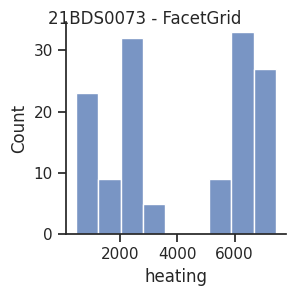

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.FacetGrid(df1).map(sns.histplot,"heating").add_legend()
g.fig.suptitle('21BDS0073 - FacetGrid', fontsize=12)
plt.show()

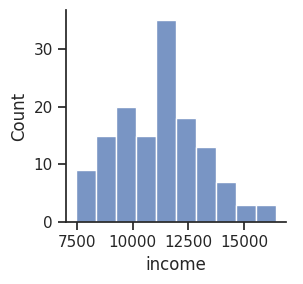

In [122]:
sns.FacetGrid(df1).map(sns.histplot,"income").add_legend()
g.fig.suptitle('21BDS0073 - FacetGrid', fontsize=12)
plt.show()

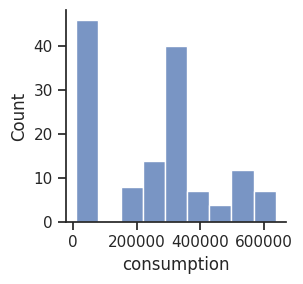

In [123]:
sns.FacetGrid(df1).map(sns.histplot,"consumption").add_legend()
g.fig.suptitle('21BDS0073 - FacetGrid', fontsize=12)
plt.show()

<ipython-input-124-65120153ab4f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['income'])


<Axes: xlabel='income', ylabel='Density'>

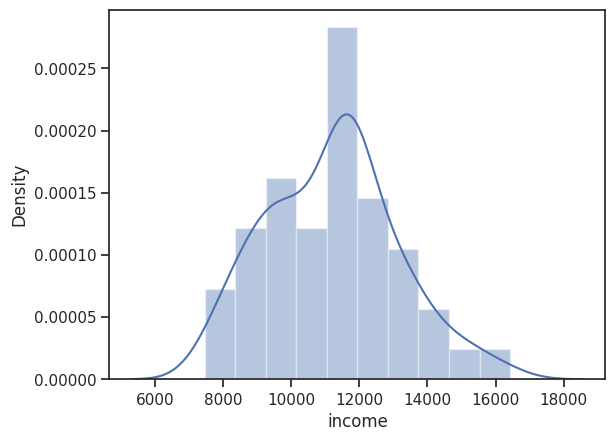

In [124]:
sns.distplot(df['income'])

<ipython-input-125-d31b099595e2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['consumption'])


<Axes: xlabel='consumption', ylabel='Density'>

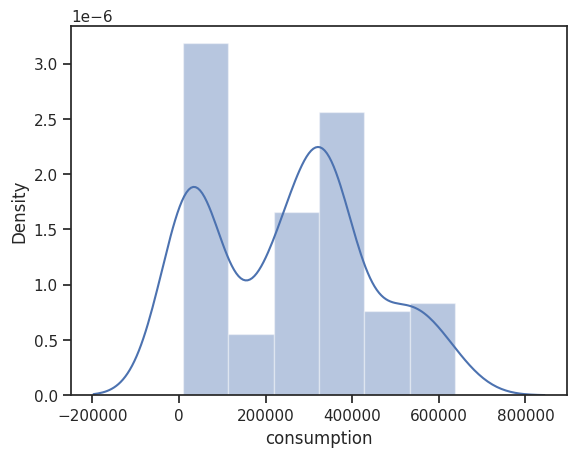

In [125]:
sns.distplot(df['consumption'])

<ipython-input-126-e7897bfa3daa>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['heating'])


<Axes: xlabel='heating', ylabel='Density'>

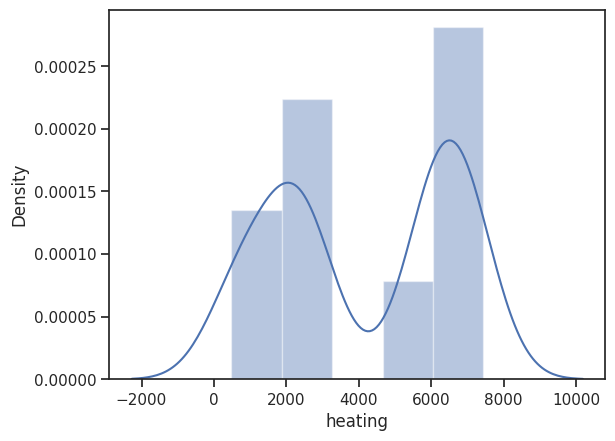

In [126]:
sns.distplot(df['heating'])

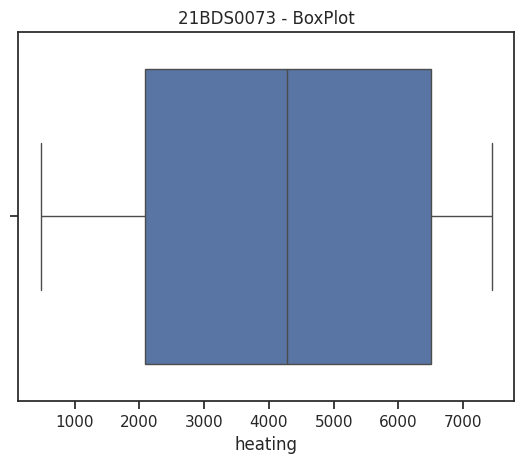

In [127]:
sns.boxplot(x="heating", data=df)
plt.title('21BDS0073 - BoxPlot')
plt.show()

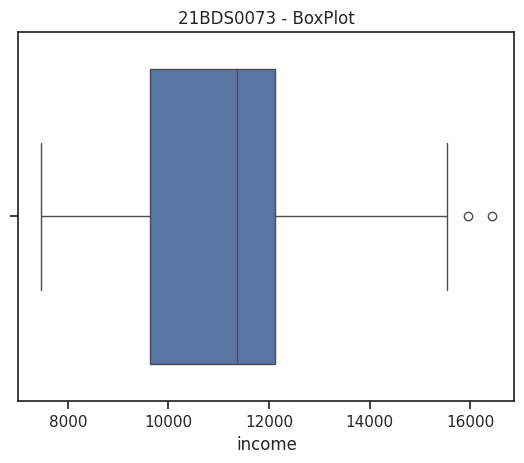

In [128]:
sns.boxplot(x="income",data=df)
plt.title('21BDS0073 - BoxPlot')
plt.show()

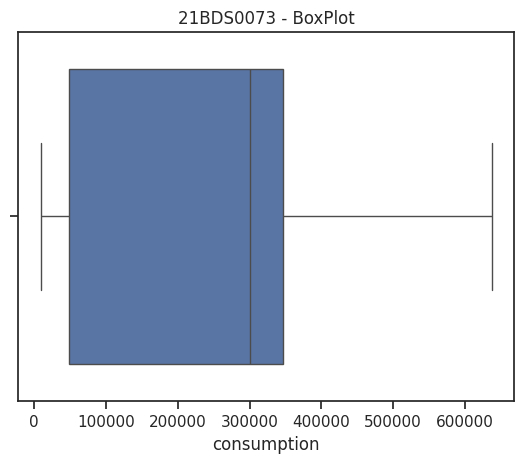

In [129]:
sns.boxplot(x="consumption",data=df)
plt.title('21BDS0073 - BoxPlot')
plt.show()

**Bivariate Analysis**

Text(0, 0.5, 'consumption')

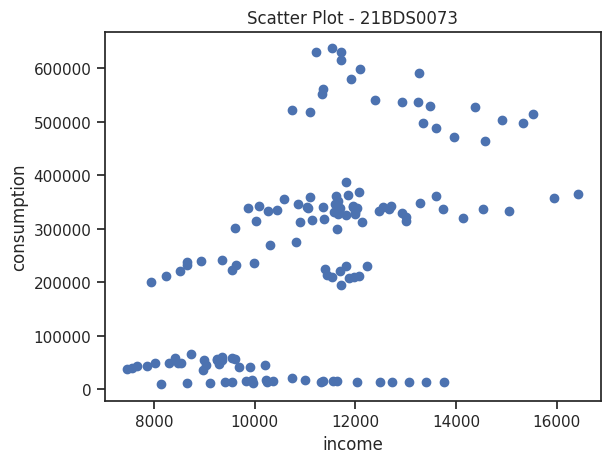

In [130]:
import matplotlib.pyplot as plt
plt.scatter(df["income"], df["consumption"])
plt.title("Scatter Plot - 21BDS0073")
plt.xlabel("income")
plt.ylabel("consumption")

**Multivariate Analysis**

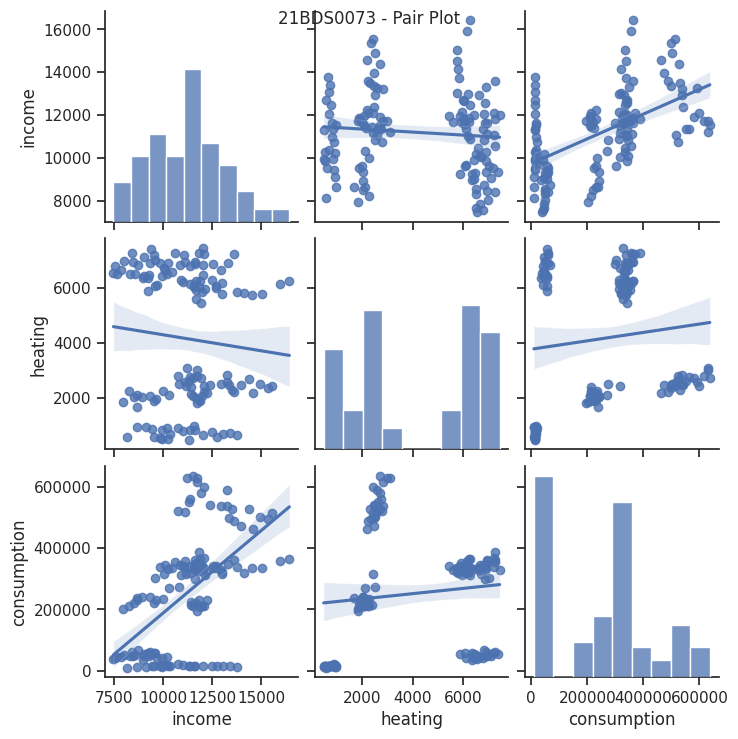

In [132]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df,vars = ['income', 'heating','consumption'],kind="reg").fig.suptitle('21BDS0073 - Pair Plot', fontsize=12)
plt.show()

In [133]:
from scipy import stats
corr = stats.pearsonr(df["income"], df["consumption"])
print("p-value:\t", corr[1])
print("cor:\t\t", corr[0])

p-value:	 1.0892847064421225e-12
cor:		 0.558558951233098


In [134]:
df2=df1.drop(['rownames','statecode','year','State_CA','State_FL'	,'State_MI','State_NY','State_TX','State_UT'],axis=1)
df2

,consumption,price,eprice,oprice,lprice,heating,income
0,313656,1.42,2.98,7.40,1.47,6262,10903.75
1,319282,1.38,2.91,7.77,1.42,6125,11370.02
2,331326,1.37,2.84,7.96,1.38,6040,11578.68
3,346533,1.40,2.87,8.33,1.37,6085,11586.77
4,352085,1.50,3.07,8.80,1.40,5907,11657.42
...,...,...,...,...,...,...,...
133,527495,5.72,7.78,30.58,5.84,2694,14368.46
134,464307,5.14,7.95,44.15,5.72,2192,14580.77
135,503473,5.26,8.03,35.24,5.14,2502,14915.05
136,497138,5.64,8.69,34.02,5.26,2366,15340.38


In [135]:
correlation = df2.corr(method='pearson')
correlation

,consumption,price,eprice,oprice,lprice,heating,income
consumption,1.000000,-0.109541,0.045979,0.013371,-0.110035,0.114430,0.558559
price,-0.109541,1.000000,0.935463,0.856882,0.985123,-0.142188,0.658469
eprice,0.045979,0.935463,1.000000,0.875059,0.924900,0.080426,0.709568
oprice,0.013371,0.856882,0.875059,1.000000,0.808498,0.002448,0.595618
lprice,-0.110035,0.985123,0.924900,0.808498,1.000000,-0.141117,0.663339
heating,0.114430,-0.142188,0.080426,0.002448,-0.141117,1.000000,-0.090510
income,0.558559,0.658469,0.709568,0.595618,0.663339,-0.090510,1.000000


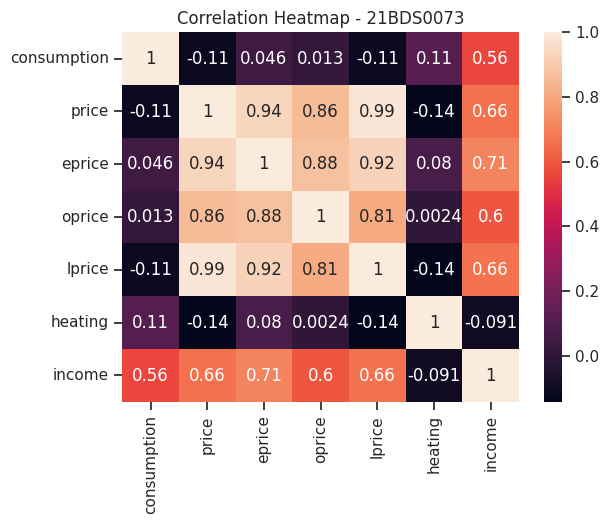

In [136]:
sns.heatmap(correlation, annot=True, xticklabels=correlation.columns, yticklabels=correlation.columns)
plt.title('Correlation Heatmap - 21BDS0073')
plt.show()